In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles

In [3]:
X,y=make_circles(n_samples=1000,noise=0.4,factor=0.1,random_state=0)

In [4]:
X

array([[ 0.27332811,  0.21477425],
       [ 0.31711843,  0.45920517],
       [-0.67651212, -1.32693619],
       ...,
       [ 0.09966542, -0.72103723],
       [ 0.30872941, -0.08194587],
       [-0.29473227, -0.15959228]])

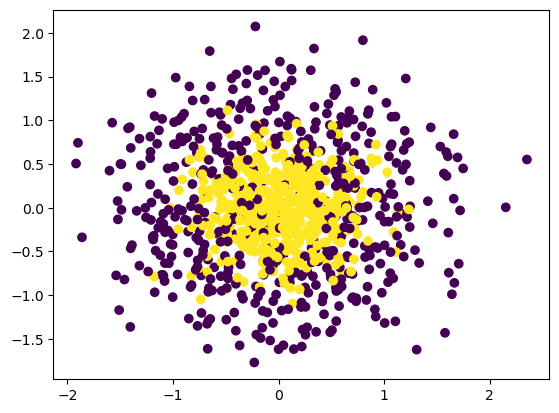

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
from sklearn.ensemble import AdaBoostClassifier

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
param_grid={'n_estimators':[1,10,50,100,120,150],'learning_rate':[0.0001,0.001,0.01,0.1,1],'algorithm':['SAMME','SAMME.R']}

In [9]:
ada=AdaBoostClassifier()

In [10]:
g=GridSearchCV(ada,param_grid=param_grid,n_jobs=-1,verbose=1)

In [11]:
g.fit(X,y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                         'n_estimators': [1, 10, 50, 100, 120, 150]},
             verbose=1)

In [12]:
g.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 100}

In [14]:
g.best_score_

0.7990000000000002

In [15]:
from mlxtend.plotting import plot_decision_regions

In [17]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=1,n_estimators=100)

In [18]:
ada.fit(X,y)

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=100)

<Axes: >

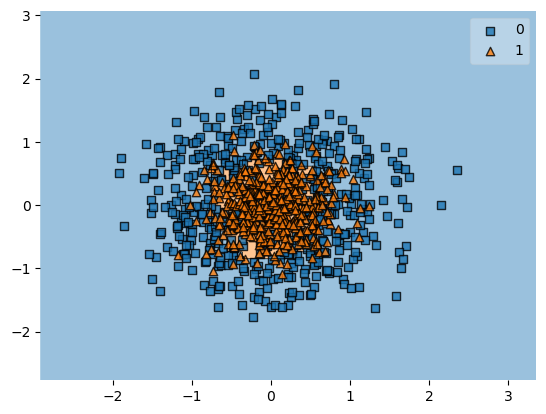

In [19]:
plot_decision_regions(np.array(X),np.array(y),ada)

In [22]:
y_pred=ada.predict(X)

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y,y_pred)

array([[395, 105],
       [ 82, 418]], dtype=int64)